# Adult income dataset - classification

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(2019)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [104]:
#data= 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
features = ["Age", "Workclass", "Fnlwgt", "Education", "EducationNum", "MaritalStatus",
        "Occupation", "Relationship", "Race", "Gender", "CapitalGain", "CapitalLoss",
        "HoursPerWeek", "Country", "Income"]
df = pd.read_csv('adult.csv', names=features)
print(len(df))
df = df.fillna(-1)
size_before = len(df)
df = df.loc[df['Country'] == 'United-States']
df = df.loc[df['Workclass'] != '?']
df = df.loc[df['Occupation'] != '?']
df = df.drop(['Country'], axis=1)
size_after = len(df)
df['Income'] = np.where(df['Income'] == '>50K',1,0)
df[['Age','Fnlwgt','EducationNum','CapitalGain','CapitalLoss','HoursPerWeek','Income'] ]=df[['Age','Fnlwgt','EducationNum','CapitalGain','CapitalLoss','HoursPerWeek','Income']].astype(str).astype(int)
delta_size = size_before - size_after

48843


## Why did i focus only on the United States?

Each country's scale of salary is different, based on factors like the GDP, cost of living etc. Mixing all countries together would not yield the optimal results. For a start, i figured i should hold the Country constant, to avoid "confusing" the model. I'd rather have a model that can perform well on ONE particular country (which anyways contributes the most to the dataset) rather than perform less and consider ALL countries. It's just a matter of choice of what model do i want to make.

## Why did drop rows that consist of columns that have "?" values in the dataset?

Not only "?" is something undefined, but also "?" could correspond to different values. Perhaps there might be a degree of similary among the instances that do have that value, but i'd rather make a model that trains on explicitly defined data. For example, in coding terms, "?" could map "type 1 unspecified working class" and in some other cases, "type 2 unspecified working class". That would also create a confusion to the model, therefore i decided to neglect it, and work with data that is more explicit.

Out of the 48843 entries of data, we lost 7551. One could argue that, that is a significant amount of lost data which is true, but atleast the model is more purified, in the sense that the data that it's been trained on, is more well defined.

In [55]:
for col in df:
    print(col)
    print(df[col].unique())

Age
[25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 52 18 39 21 42 33 30 47 41 19 69 50 31 59 49 58 40 57 27 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]
Workclass
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
Fnlwgt
[226802  89814 336951 ... 199655 255835 257302]
Education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Assoc-voc' '9th' 'Doctorate' '12th'
 '5th-6th' '1st-4th' 'Preschool']
EducationNum
[ 7  9 12 10  6 15  4 13 14 11  5 16  8  3  2  1]
MaritalStatus
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']
Occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Transport-moving' 'Priv-house-serv'
 'Handlers-cleaners

In [49]:
df.isna().sum()

Age              0
Workclass        0
Fnlwgt           0
Education        0
EducationNum     0
MaritalStatus    0
Occupation       0
Relationship     0
Race             0
Gender           0
CapitalGain      0
CapitalLoss      0
HoursPerWeek     0
Income           0
label            0
dtype: int64

In [50]:
print(df.head())

   Age  Workclass  Fnlwgt     Education  EducationNum       MaritalStatus  \
1   25    Private  226802          11th             7       Never-married   
2   38    Private   89814       HS-grad             9  Married-civ-spouse   
3   28  Local-gov  336951    Assoc-acdm            12  Married-civ-spouse   
4   44    Private  160323  Some-college            10  Married-civ-spouse   
6   34    Private  198693          10th             6       Never-married   

          Occupation   Relationship   Race Gender  CapitalGain  CapitalLoss  \
1  Machine-op-inspct      Own-child  Black   Male            0            0   
2    Farming-fishing        Husband  White   Male            0            0   
3    Protective-serv        Husband  White   Male            0            0   
4  Machine-op-inspct        Husband  Black   Male         7688            0   
6      Other-service  Not-in-family  White   Male            0            0   

   HoursPerWeek  Income  label  
1            40       0      

# Data visualization

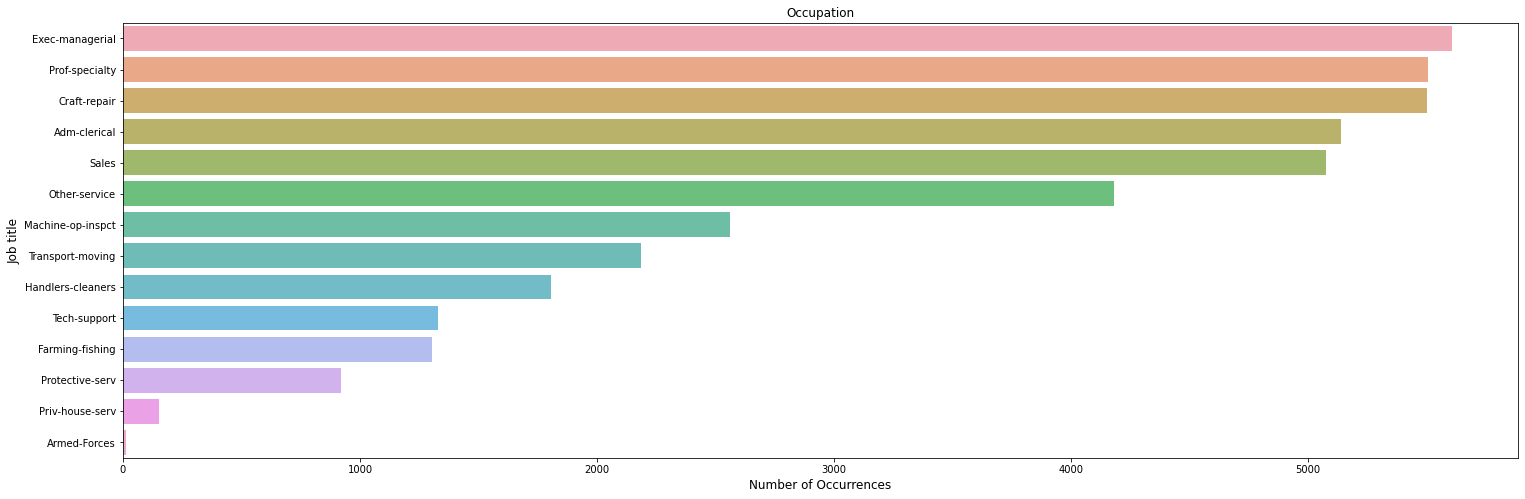

In [105]:
plt.figure(figsize=(25,8))
sns.countplot(y='Occupation',order= df.Occupation.value_counts().index, alpha=0.8,data = df)
plt.title('Occupation')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('Job title', fontsize=12)
plt.show()

<AxesSubplot:title={'center':'Race Distribution'}, xlabel='count', ylabel='Race'>

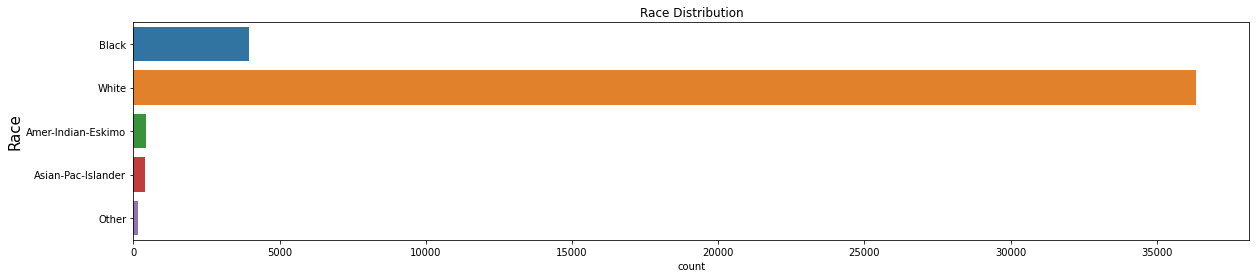

In [106]:
plt.figure(figsize=(20,4))
plt.title('Race Distribution')
plt.ylabel('Race', fontsize=15)
sns.countplot(y ='Race', data=df)

This makes sense because based on https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States#:~:text=Per%20the%20ACS%3A%203.9%25%20two,reached%2058%20million%20in%202016 , the US consists of 60.1% non-Hispanic White, and 13.4% Black or African American, so the data gathered by race is compatible with what Wikipedia states. 

<AxesSubplot:title={'center':'Gender Distribution'}, xlabel='count', ylabel='Gender'>

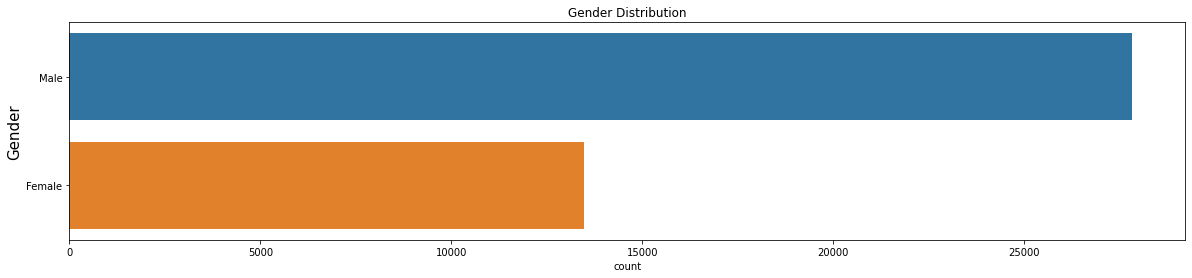

In [107]:
plt.figure(figsize=(20,4))
plt.title('Gender Distribution')
plt.ylabel('Gender', fontsize=15)
sns.countplot(y ='Gender', data=df)

This doesn't look good. If the "Gender" feature is of high importance, then our data would not be a good sample of population.

## 

<ipython-input-111-5d532bb69b1a>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


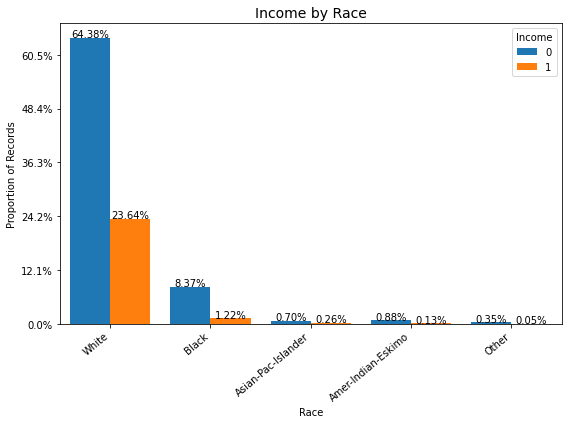

In [111]:
# Use occupation percentage of '>50K' as order of the plot
order = (df.Race[df.Income==1].value_counts()/df.shape[0]).index

# Plotting the income by age
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'Race', hue = 'Income', order = order, data = df, saturation=1)
ax.set_title('Income by Race', fontsize = 14)
ax.set_xlabel("Race")
ax.set_ylabel("Proportion of Records")

# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total =df.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.legend(loc=1, title='Income')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100.0),
            ha="center") 
    
plt.tight_layout()
plt.show()

# Gender vs Income

<AxesSubplot:title={'center':'Age vs Income'}, xlabel='Age', ylabel='count'>

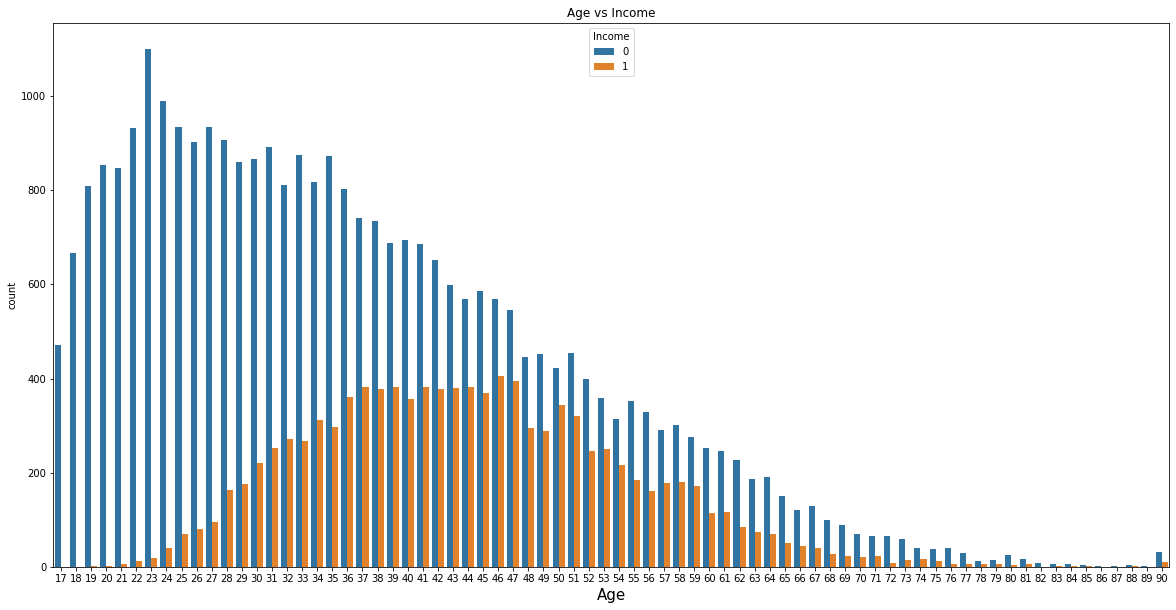

In [112]:
plt.figure(figsize=(20,10))
plt.title('Age vs Income')
plt.xlabel('Age', fontsize=15)
sns.countplot(x = 'Age',hue='Income', data=df)

<AxesSubplot:xlabel='Workclass', ylabel='count'>

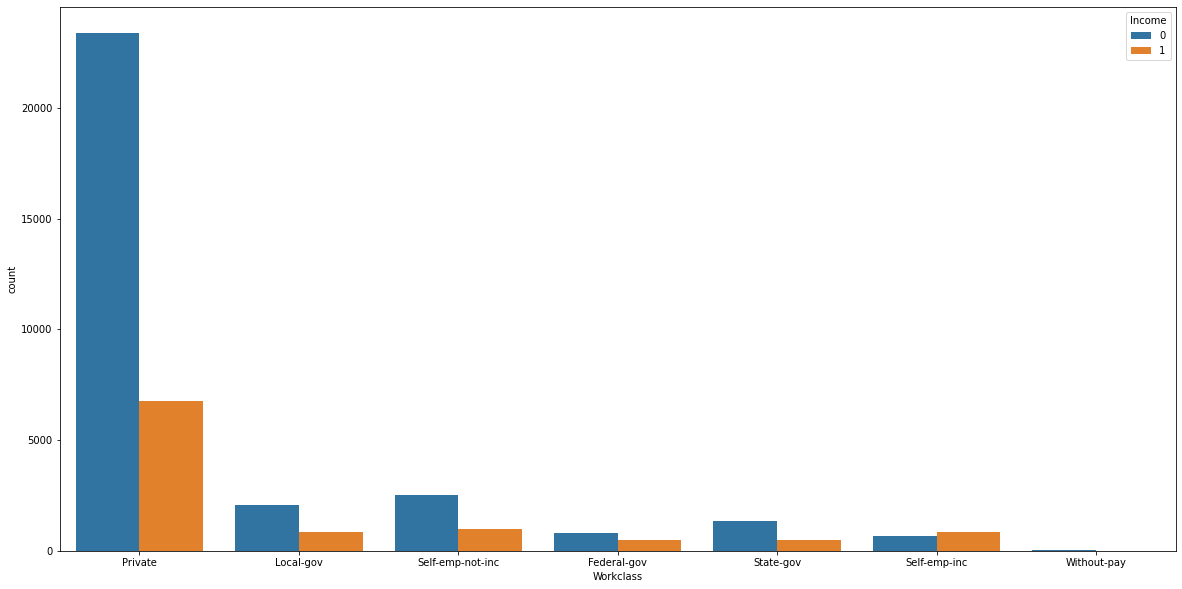

In [121]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'Workclass',hue='Income', data=df)

It seems like a big portion of the data gathered, has been drawed from individuals working in the private sector. Interesting.

In [56]:
df_cat = df[['Workclass','Education','MaritalStatus','Occupation','Relationship','Race','Gender']]
df_cat.head()

,Workclass,Education,MaritalStatus,Occupation,Relationship,Race,Gender
1,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male
2,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male
3,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male
4,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male
6,Private,10th,Never-married,Other-service,Not-in-family,White,Male


In [57]:
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_10th,Education_11th,Education_12th,Education_1st-4th,Education_5th-6th,Education_7th-8th,Education_9th,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_HS-grad,Education_Masters,Education_Preschool,Education_Prof-school,Education_Some-college,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,MaritalStatus_Never-married,MaritalStatus_Separated,MaritalStatus_Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Gender_Female,Gender_Male
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [58]:
df = df.drop(['Workclass','Education','MaritalStatus','Occupation','Relationship','Race','Gender'],axis=1).join(df_cat)

In [74]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
data_norm= pd.DataFrame(np_scaled, columns = df.columns)
data_norm.head()

,Age,Fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek,Income,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,Workclass_Without-pay,Education_10th,Education_11th,Education_12th,Education_1st-4th,Education_5th-6th,Education_7th-8th,Education_9th,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_HS-grad,Education_Masters,Education_Preschool,Education_Prof-school,Education_Some-college,MaritalStatus_Divorced,MaritalStatus_Married-AF-spouse,MaritalStatus_Married-civ-spouse,MaritalStatus_Married-spouse-absent,MaritalStatus_Never-married,MaritalStatus_Separated,MaritalStatus_Widowed,Occupation_Adm-clerical,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Husband,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Gender_Female,Gender_Male
0,0.109589,0.144430,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.287671,0.051677,0.533333,0.000000,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.150685,0.219011,0.733333,0.000000,0.0,0.397959,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.369863,0.099418,0.600000,0.076881,0.0,0.397959,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.232877,0.125398,0.333333,0.000000,0.0,0.295918,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [75]:
y = data_norm['Income']
X = data_norm.drop(['Income'], axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)

In [114]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

In [115]:
clf_rf = RandomForestClassifier(max_depth = 30,random_state=0)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, random_state=0)

# clf_rf.fit(X_train,y_train)

In [116]:
y_pred = clf_rf.predict(X_test)

In [117]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [118]:
accuracy_score(y_test,y_pred)

0.8554304395205231

In [ ]:
max_depth_range = list(range(5,30))
accuracy = []
for depth in max_depth_range:
    clf= DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

Text(0.5, 0, 'max depth')

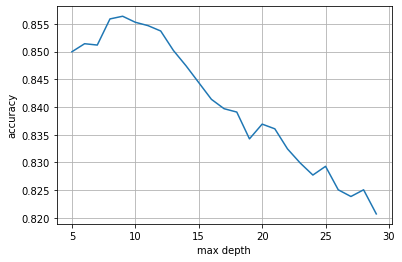

In [120]:
plt.plot(max_depth_range, accuracy) #adds the line
plt.grid() #adds a grid to the plot
plt.ylabel('accuracy') #xlabel
plt.xlabel('max depth') #ylabel

# Conculsion

A couple of things. We started with using 5 for the max_depth hyperparameter, and it seems that the model underfits the data. The peak performance is around 8 perhaps 9. After that the model overfits the training data, hence it does not generalize well to new data.